In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


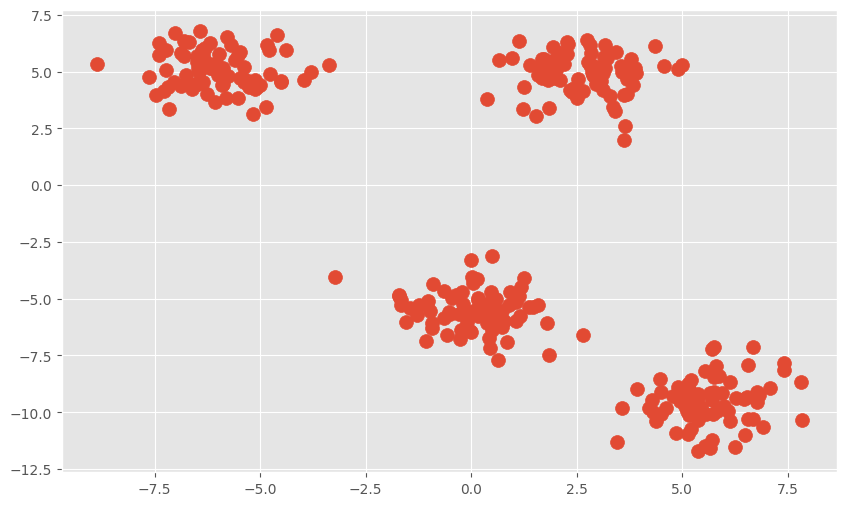

In [3]:
from sklearn.datasets._samples_generator import make_blobs
x , y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=10)
plt.figure(figsize=(10,6))
plt.scatter(x[:, 0], x[:, 1], s=100);

In [4]:
import cv2 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

In [5]:
import numpy as np 
compactness , labels, centers = cv2.kmeans(x.astype(np.float32), 4, None, criteria, 10, flags)

In [6]:
compactness

526.6774351084605

High compactness Score : Indicates all points close to their cluster centers

Low compactness Score  : Indicates diffrent clusters might not be well separated

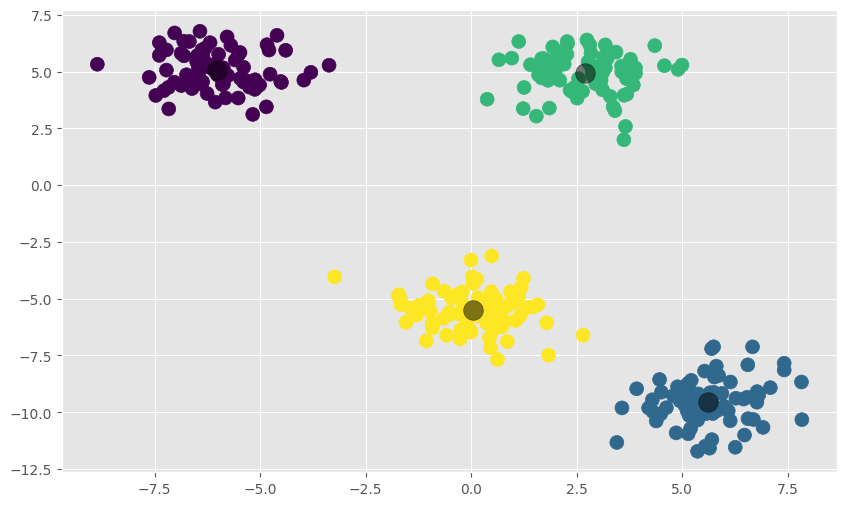

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c = labels, s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [8]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np

def find_clusters(X, n_cluster, rseed=5):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_cluster]
    centers = X[i]

    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
        for i in range(n_cluster)])
        if np.all(centers == new_centers):
            break
        centers =new_centers

    return centers, labels

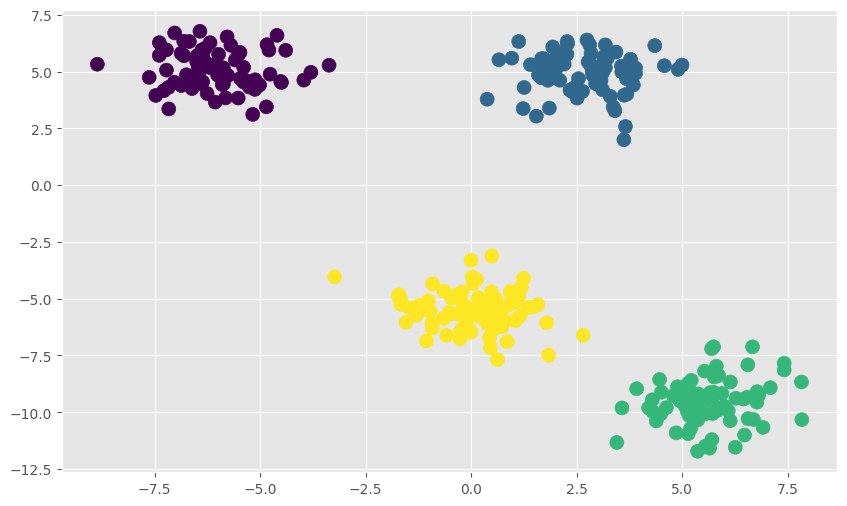

In [9]:
centers , labels = find_clusters(x, 4)
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:,  1],c =labels, s=100);

First Caveat :we must select number of clusters beforehand , Expectation_maximization step improves result in each step

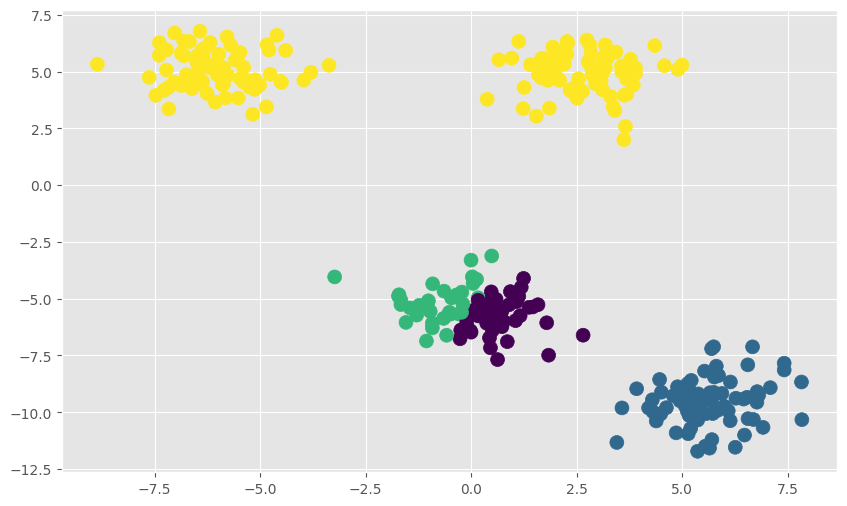

In [10]:
centers , labels = find_clusters(x, 4,rseed=10)
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:,  1],c =labels, s=100);

Second Caveat  : we must select number of clusters beforehand

In [11]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness , labels, centers = cv2.kmeans(x.astype(np.float32), 6, None, criteria, 10, flags)


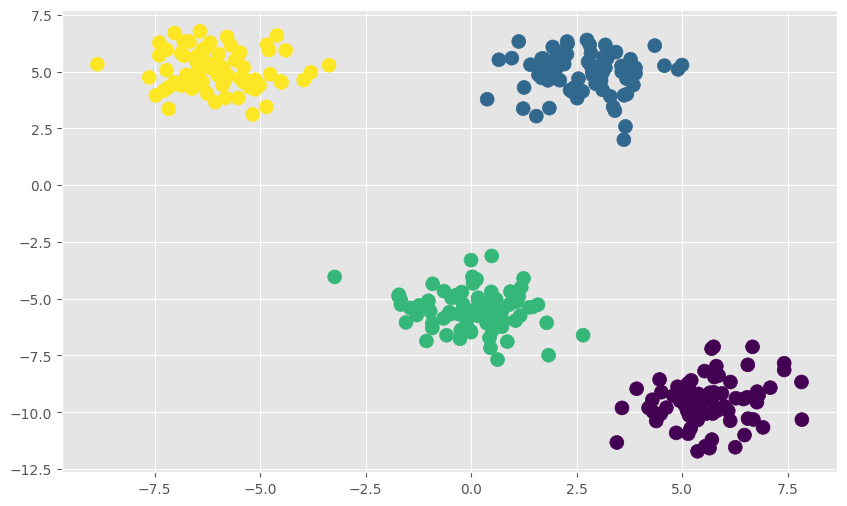

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:,  1],c =y_true, s=100);

In [13]:
kvals = np.arange(2, 10)
compactness = []
for k in kvals:
    c,_, _ =cv2.kmeans(x.astype(np.float32), k, None, criteria, 10, flags)
    compactness.append(c)

Text(0, 0.5, 'compactness')

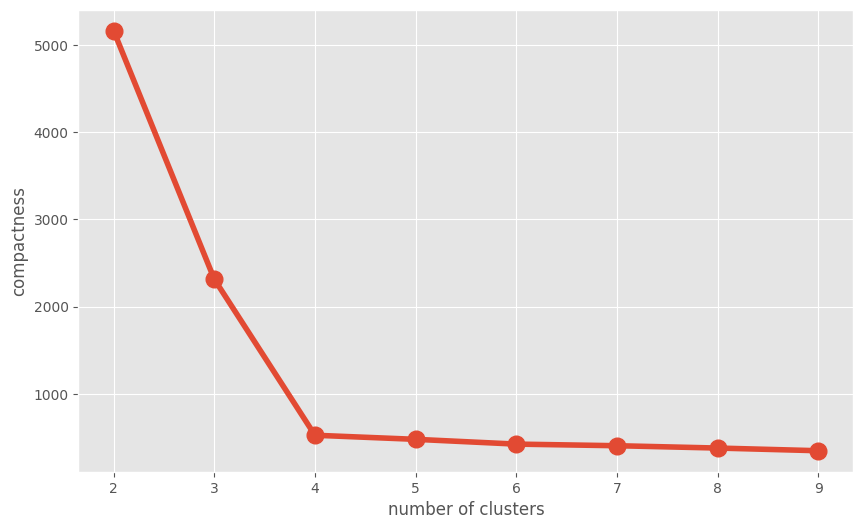

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(kvals, compactness, 'o-', linewidth=4, markersize=12);
plt.xlabel('number of clusters')
plt.ylabel('compactness')

In [15]:
from sklearn.datasets import make_moons
x, y = make_moons(200, noise=.05, random_state=12)

In [16]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness , labels, centers = cv2.kmeans(x.astype(np.float32), 6, None, criteria, 10, flags)

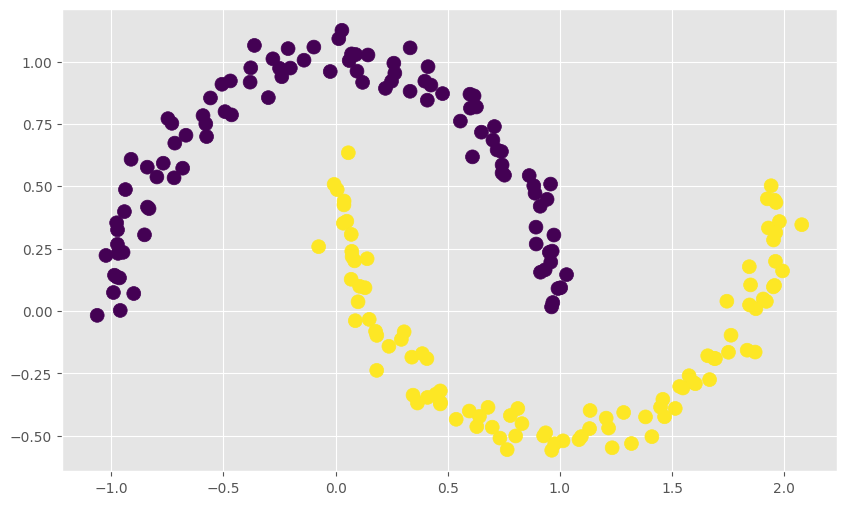

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:,  1],c =y, s=100);

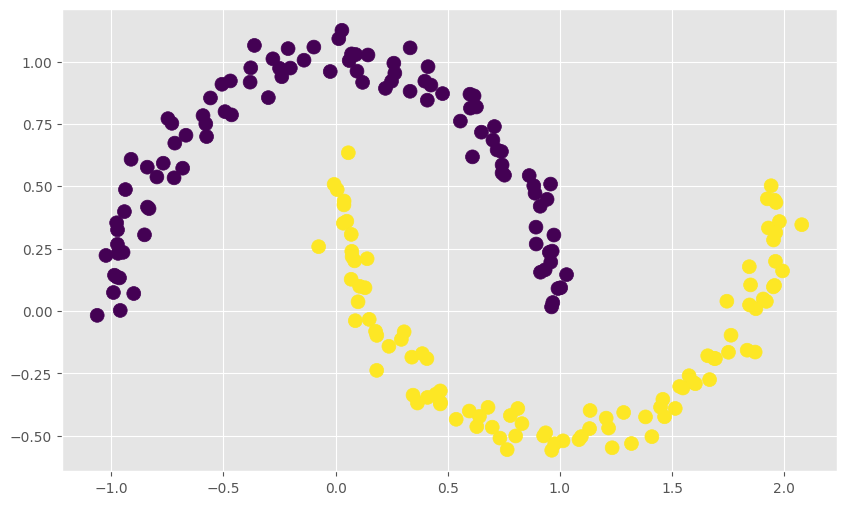

In [18]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(x)
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:,  1],c =labels, s=100);

Comparision of Image Color Spaces

use kmeans to reduce colors (compress)

In [19]:
import cv2 
import numpy as np
lena = cv2.imread('data/image/lena.jpg',cv2.IMREAD_COLOR)

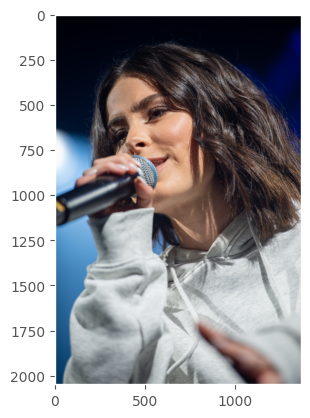

In [20]:
plt.rc('axes', **{'grid' : False})
plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))

In [21]:
lena.shape

(2048, 1363, 3)

In [22]:
img_data = lena /255.0
img_data = img_data.reshape((-1, 3))
img_data.shape

(2791424, 3)

In [23]:
def plot_pixels(data, title, colors=None, N= 10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    pixel = data[i].T
    R, G, B = pixel[0], pixel[1], pixel[2]

    fig, ax = plt.subplots(1,2,figsize=(16, 6))
    ax[0].scatter(R,G, color= colors, marker='.')
    ax[0].set(xlabel='Red', ylabel= 'Green', xlim =(0,1), ylim=(0.1))

    ax[1].scatter(R,B, color= colors, marker='.')
    ax[1].set(xlabel='Red', ylabel= 'Blue', xlim =(0,1), ylim=(0.1))

    fig.suptitle(title, size=20)


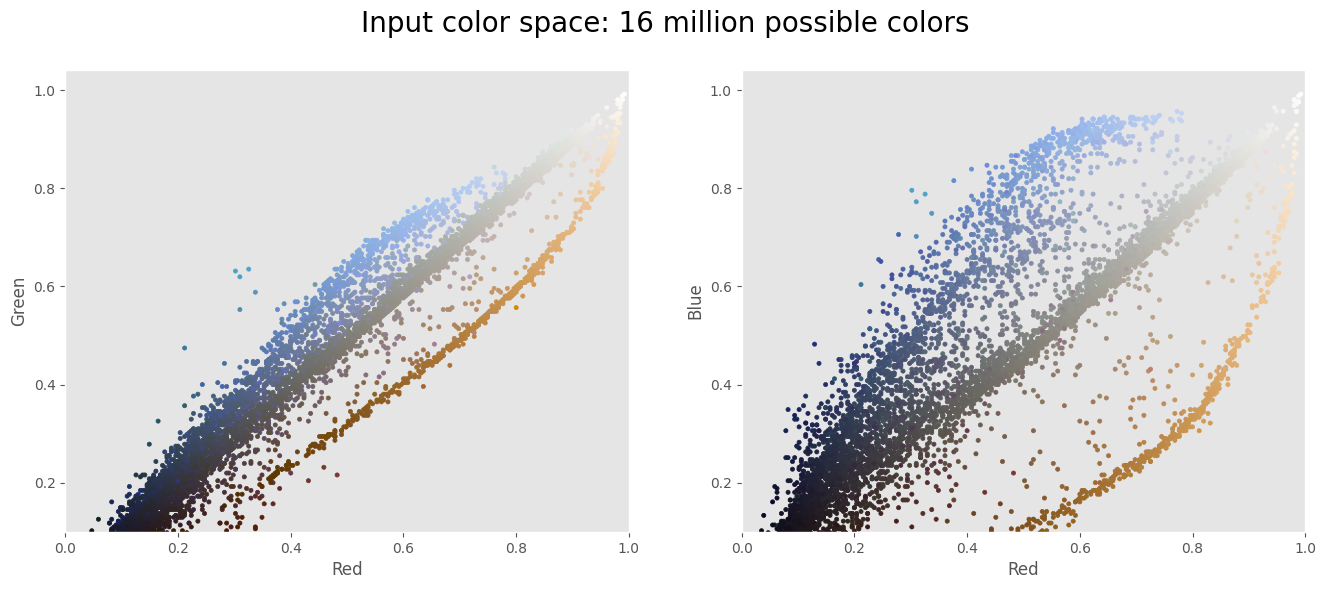

In [24]:
plot_pixels(img_data, title='Input color space: 16 million possible colors')

In [25]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags  = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(img_data.astype(np.float32), 16, None, criteria, 10, flags)

In [26]:
centers

array([[0.05611696, 0.08679801, 0.18439834],
       [0.4055843 , 0.41916534, 0.45879903],
       [0.16837801, 0.16383646, 0.21846868],
       [0.11153024, 0.10532602, 0.1595873 ],
       [0.13043718, 0.09546694, 0.10092133],
       [0.6481802 , 0.6687759 , 0.69619006],
       [0.4716718 , 0.54914707, 0.70299155],
       [0.2791616 , 0.25842673, 0.26954332],
       [0.5464991 , 0.36075175, 0.1388225 ],
       [0.22324072, 0.2576819 , 0.3582253 ],
       [0.29262564, 0.06662948, 0.01598728],
       [0.834998  , 0.82758516, 0.80680513],
       [0.76581603, 0.5711812 , 0.33612582],
       [0.08006546, 0.02431851, 0.01316038],
       [0.4161328 , 0.25591153, 0.06547508],
       [0.9372747 , 0.9318848 , 0.9142833 ]], dtype=float32)

In [27]:
new_colors = centers[labels].reshape((-1,3))


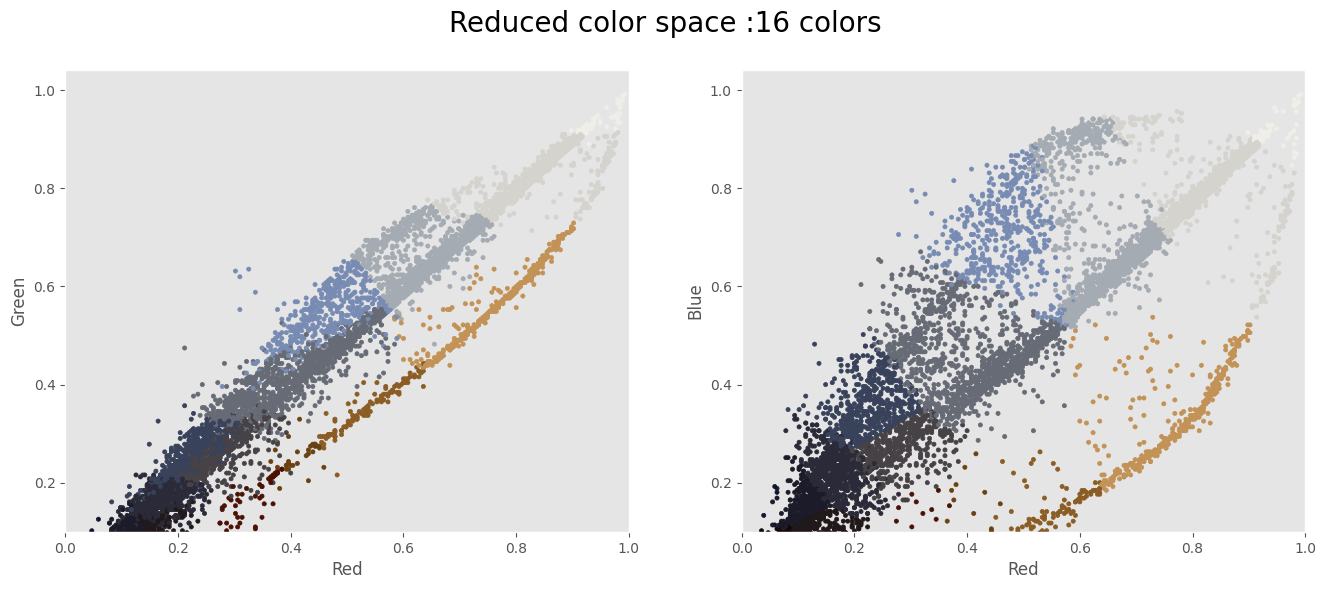

In [28]:
plot_pixels(img_data, colors= new_colors, title='Reduced color space :16 colors')

In [29]:
lena_recolored = new_colors.reshape(lena.shape)

Text(0.5, 1.0, '16- color image')

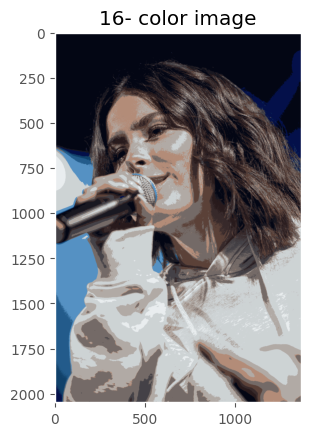

In [30]:
plt.imshow(cv2.cvtColor(lena_recolored, cv2.COLOR_BGR2RGB));
plt.title('16- color image')


Classifying Handwritten Digit Using k-Means

In [31]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [32]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

In [33]:
compactness, clusters, centers = cv2.kmeans(digits.data.astype(np.float32), 10, None, criteria, 10, flags)

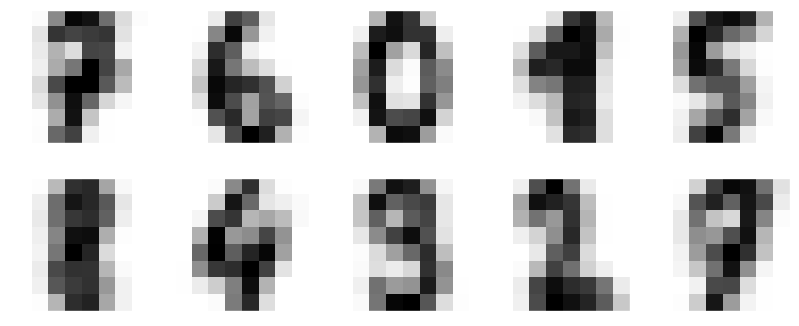

In [34]:
fig, ax = plt.subplots(2,5, figsize=(10,4))
centers = centers.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    plt.savefig('data/image/digits.png')

In [35]:
from scipy.stats import mode

labels = np.zeros_like(clusters.ravel())
for i in range(10):
    mask = (clusters.ravel() == i)
    labels[mask] = mode(digits.target[mask])[0]

<ipython-input-35-2afb3dbc83fd>:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7284362826933779

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(digits.target, labels)

array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,  56,  24,   0,   0,   1,   3,   0,  98,   0],
       [  1,   2, 154,   4,   0,   0,   0,   3,  13,   0],
       [  0,   0,   2, 160,   0,   2,   0,  11,   8,   0],
       [  0,   3,   0,   0, 164,   0,   0,  12,   2,   0],
       [  0,   0,   0,  41,   2, 137,   2,   0,   0,   0],
       [  1,   1,   0,   0,   0,   0, 177,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   1,   0],
       [  1,   7,   1,  44,   0,   4,   2,   9, 106,   0],
       [  0,  16,   0, 145,   0,   4,   0,  15,   0,   0]])

Organizing Clusters as a Hierarchical tree

In [38]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=100, n_samples=10)


In [39]:
from sklearn import cluster
agg = cluster.AgglomerativeClustering(n_clusters=3)


In [40]:
labels = agg.fit_predict(X)

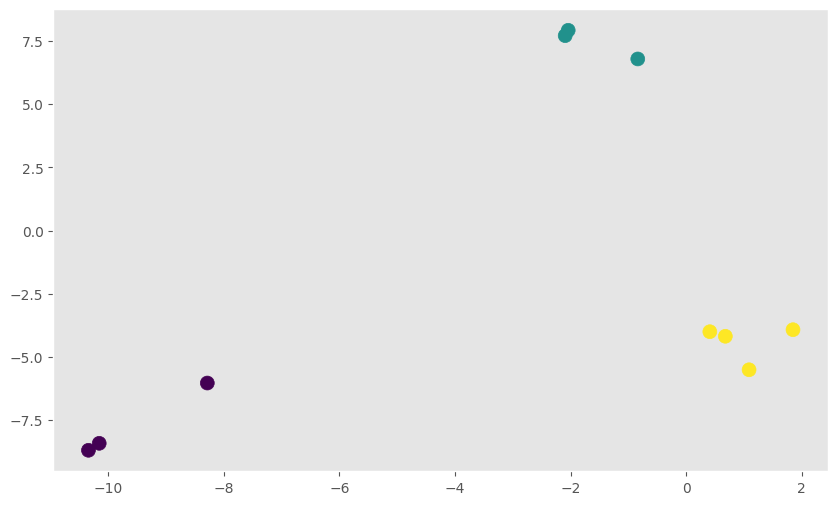

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100)

Using Deep learning to classify Handwritten Digits

In [42]:
# perceptron implementation

class Perceptron(object):

    def __init__(self, lr=0.01, n_iter=10):

        self.lr = lr
        self.n_iter = n_iter


    def predict(self, X):

        return np.where(np.dot(X, self.weights) + self.bias >= 0.0, 1, -1)

    def fit(self, X, y):

        self.weights = np.zeros(X.shape[1])
        self.bias = 0.0
        for _ in range(self.n_iter):
            for xi, yi in zip(X, y):
                delta = self.lr * (yi - self.predict(xi))
                self.weights += delta * xi
                self.bias += delta

In [43]:
from sklearn.datasets._samples_generator import make_blobs
x, y = make_blobs(n_samples= 100, centers=2, cluster_std=2.2, random_state=42)

In [44]:
y = 2 * y - 1

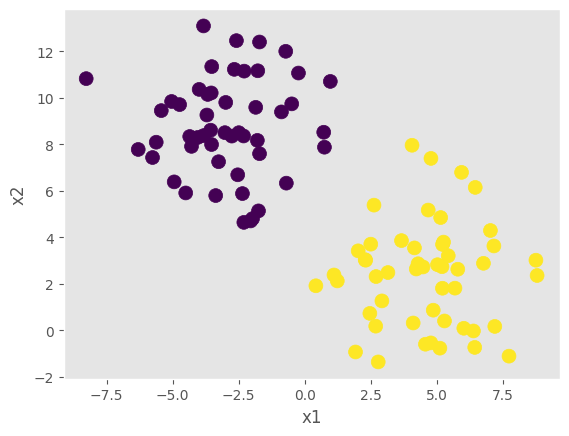

In [45]:
plt.scatter(x[:, 0], x[:, 1], s=100, c=y);
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('data/image/perceptron-data.png')

In [46]:
p = Perceptron(lr= 0.1, n_iter=10)

p.fit(x,y)


In [47]:
p.weights

array([ 2.20091094, -0.4798926 ])

In [48]:
p.bias

0.2

In [49]:
accuracy_score(p.predict(x), y)

1.0

In [50]:
def plot_decision_boundary(classifier, X_test, y_test):

    h= 0.02
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:,0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    X_hypo = np.column_stack((xx.ravel().astype(np.float32),
                              yy.ravel().astype(np.float32)))

    zz = classifier.predict(X_hypo)
    zz = zz.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha= 0.8)    
    plt.scatter(X_test[:, 0],X_test[:, 1], c=y_test, s=200)

Text(0, 0.5, 'x2')

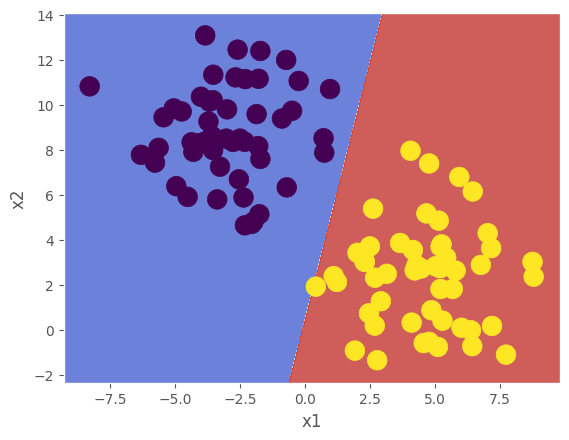

In [51]:
plot_decision_boundary(p,x,y)
plt.xlabel('x1')
plt.ylabel('x2')